In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import norm
import seaborn as sns
from scipy import stats
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
print("Library")



Library


In [4]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, roc_curve, mean_squared_error

#from catboost import CatBoostClassifier

In [5]:
veri=pd.read_csv("hmelq.csv")

In [6]:
veri.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [7]:
dms=pd.get_dummies(veri[['reason', 'job']])
dms.head()

,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0


In [8]:
n_veri = veri.drop(["reason","job"],axis=1)
n_veri.head()

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [9]:
veri = pd.concat([n_veri, dms[["reason_DebtCon","reason_HomeImp","job_Mgr","job_Office","job_Other","job_ProfEx","job_Sales","job_Self"]]],axis = 1)
veri=veri.dropna()
veri.head()

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
0,0,81200,18834.0,108355.0,28.0,0.0,0.0,139.14,0.0,14.0,34.042,0,1,0,0,0,0,0,0
1,0,12600,103960.0,127384.0,2.0,0.0,0.0,129.02,0.0,25.0,34.479,1,0,0,0,0,0,0,0
2,0,18000,46865.0,61266.0,5.0,0.0,0.0,102.59,2.0,9.0,26.354,1,0,0,0,0,0,0,0
3,0,10300,57676.0,71027.0,19.0,0.0,0.0,157.52,1.0,11.0,33.992,1,0,0,0,0,0,0,0
4,0,9400,56508.0,78358.0,17.0,0.0,0.0,141.93,0.0,11.0,32.327,1,0,0,0,0,0,0,0


In [10]:
y=veri["bad"]
X=veri.drop(["bad"],axis=1)
X=pd.DataFrame(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1473, 18)
(632, 18)
(1473,)
(632,)


# RANDOM FOREST

In [12]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier().fit(X_train,y_train)
rf_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [13]:
y_pred=rf_model.predict(X_test)
accuracy_score(y_test,y_pred)


0.9430379746835443

In [13]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       574
           1       0.89      0.43      0.58        58

    accuracy                           0.94       632
   macro avg       0.92      0.71      0.78       632
weighted avg       0.94      0.94      0.93       632



# **RandomForest Model Tuning**

In [ ]:
?rf_model

In [14]:
rf_params= {"max_depth": [2,5,8],
           "max_features": [2,5,8],
           "n_estimators": [10,50,500],
           "min_samples_split": [2,5,8]}

In [ ]:
cart_model.predict(X_test)[0:5]

In [ ]:
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

In [15]:


rf_model = RandomForestClassifier()
rf_cv_model=GridSearchCV(rf_model,rf_params,cv=10,n_jobs=-1,verbose=2)
rf_cv_model.fit(X_train,y_train)



Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  3.1min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [16]:


print("En iyi parametreler: " + str(rf_cv_model.best_params_))



En iyi parametreler: {'max_depth': 8, 'max_features': 8, 'min_samples_split': 2, 'n_estimators': 500}


In [14]:


rf_tuned = RandomForestClassifier(max_depth = 8,
                                 max_features =8,
                                 min_samples_split=8,
                                 n_estimators=500)
rf_tuned.fit(X_train,y_train)



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [15]:


y_pred=rf_tuned.predict(X_test)
accuracy_score(y_test,y_pred)





0.939873417721519

In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       574
           1       0.85      0.38      0.52        58

    accuracy                           0.94       632
   macro avg       0.89      0.69      0.74       632
weighted avg       0.93      0.94      0.93       632





Precisionlar ve f1 score düşmüştür


In [21]:
Importance = pd.DataFrame({"Importance":rf_tuned.feature_importances_*100}, index=X_train.columns)


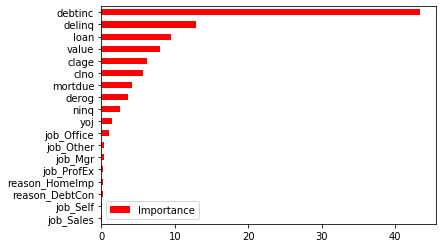

In [22]:
Importance.sort_values(by="Importance", axis=0, ascending=True).plot(kind="barh", color ='r')
plt.show()



Importance grafiğine ve tablosuna bakılıdğında debtinc ve delinq parametrelerinin anlamlı olduğu çıkmıştır.Importance değerinin 10'dan büyük olduğu tek parametreler:debtinc ve delinqdir


# 3-)Gradient Boosting
Normal hızdaki boosting;



In [23]:
#Datamızdaki 0ların ve 1lerin oranı unbalaced ise boosting uygulamaları daha uygundur çünkü bu modellerde 
#daha iyi öğrendiği sampleları seçmeye eğilimlidir.

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

In [16]:
gbm_model=GradientBoostingClassifier().fit(X_train,y_train) #default degerlerle model kurduk

In [17]:
y_pred=gbm_model.predict(X_test)#default degerlerden kurulan modelden tahmin edilen y lerimizi aldık
accuracy_score(y_test,y_pred) #gercek y degerleri ile modelimizin tahmin ettigi y degerlerinin farkından accuracyi bulduk

0.9430379746835443

In [27]:


print(classification_report(y_test,y_pred)) #default degerlerle kurulan modelimizin basarisini inceleriz



              precision    recall  f1-score   support

           0       0.94      1.00      0.97       574
           1       0.92      0.41      0.57        58

    accuracy                           0.94       632
   macro avg       0.93      0.71      0.77       632
weighted avg       0.94      0.94      0.93       632



# 3.1-) Gradient Boosting Model Tuning

In [28]:
gbm_params={"learning_rate":[0.001,0.01,0.1,0.05],"n_estimators":[10,50,100],"max_depth":[3,5,10],"min_samples_split":[2,5,10]}

In [29]:
gbm=GradientBoostingClassifier()
gbm_cv=GridSearchCV(gbm,gbm_params,cv=10,n_jobs=-1,verbose=5)



Precision: 1 için iyileşmiş Recall : 0 için iyileşmiş, 1 için düşmüştür f1-score : 0 için iyileşmiş, 1 için düşmüştür Accuracy : iyileşmiştir


In [30]:
gbm_cv.fit(X_train,y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   42.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 874 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  2.8min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_...
                 

In [31]:
print("En iyi parametreler: "+str(gbm_cv.best_params_))

En iyi parametreler: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 100}


In [18]:
gbm=GradientBoostingClassifier(learning_rate=0.1,max_depth=3,min_samples_split=10,n_estimators=100)

In [19]:
gbm_tuned=gbm.fit(X_train,y_train) #en iyi parametrelerle modelimizi tekrar kurduk


In [34]:
y_pred=gbm_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.9462025316455697

In [35]:
print(classification_report(y_test,y_pred)) #en iyi degerlerle kurulan modelimizin basarisini inceleriz
#0 lar icin; precision ve f1 degeri iyilesmis
#1 ler icin ;tüm degerler iyilesmis

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       574
           1       0.93      0.45      0.60        58

    accuracy                           0.95       632
   macro avg       0.94      0.72      0.79       632
weighted avg       0.95      0.95      0.94       632



# RESULTS BEFORE THE TUNE

In [20]:
modeller = [
    rf_model,
    gbm_model
]


for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)     
    dogruluk = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(isimler + ":" )
    print("Accuracy: {:.4%}".format(dogruluk))

----------------------------
RandomForestClassifier:
Accuracy: 94.3038%
----------------------------
GradientBoostingClassifier:
Accuracy: 94.3038%


# RESULTS AFTER THE TUNE

In [21]:
modeller = [
    rf_tuned,
    gbm_tuned
   
]


for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)     
    dogruluk = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(isimler + ":" )
    print("Accuracy: {:.4%}".format(dogruluk))


----------------------------
RandomForestClassifier:
Accuracy: 93.9873%
----------------------------
GradientBoostingClassifier:
Accuracy: 94.6203%
